In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

# Пункт 1

In [3]:
iris = datasets.load_iris()

In [4]:
# Смотрим на названия переменных
/print iris.feature_names
# Смотрим на данные, выводим 3 первые строки: 
/print iris.data[:3,:2]
# Смотрим на целевую переменную:
/print iris['target_names']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]]
['setosa' 'versicolor' 'virginica']


In [5]:
iris_frame = pd.DataFrame(iris.data,columns = iris.feature_names)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris['target']
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame['target'].map(lambda x : iris['target_names'][x])
# Смотрим, что получилось:
iris_frame#.iloc[::10,1:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


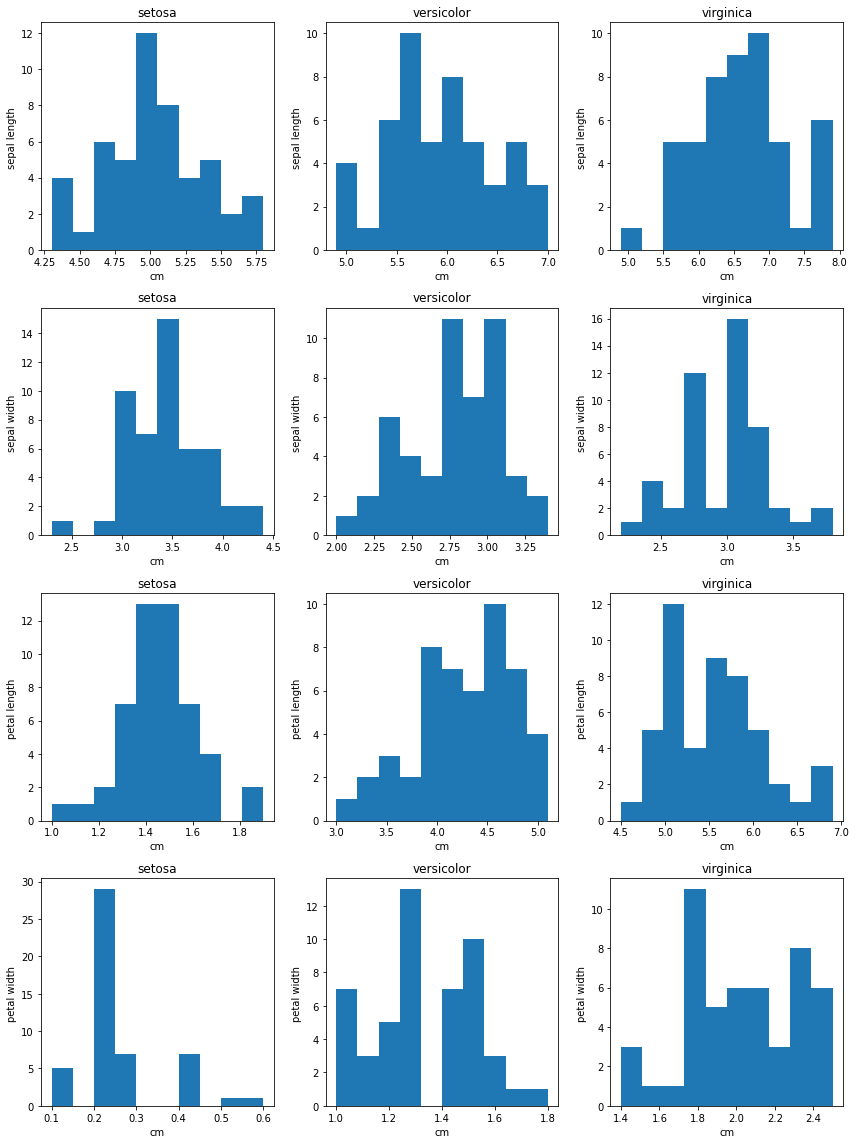

In [6]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize = (12, 16))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        #pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
        pyplot.hist(iris_frame.loc[iris_frame['name'] == target_name,feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

pyplot.tight_layout()

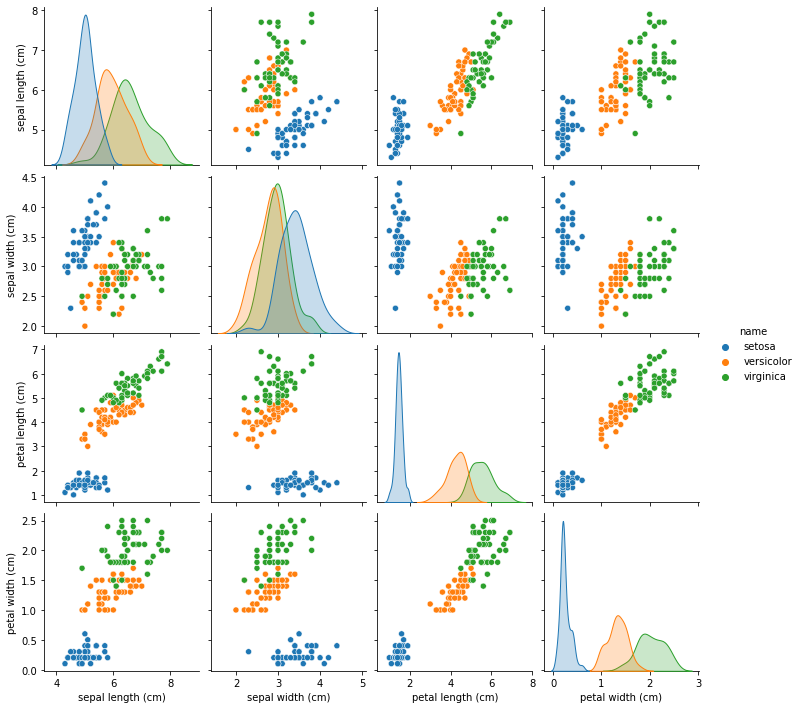

In [7]:
import seaborn as sns

#sns.pairplot(iris_frame.iloc[:,:5], hue = 'target')
sns.pairplot(iris_frame.iloc[:,[0,1,2,3,5]], hue = 'name');

In [8]:
iris_frame.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [9]:
iris_frame.iloc[:, :4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [10]:
#iris_frame.groupby(['name','target']).corr()
iris_frame.iloc[:,[0,1,2,3,5]].groupby('name').corr()

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

# Пукнт 2


In [11]:
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [12]:
def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

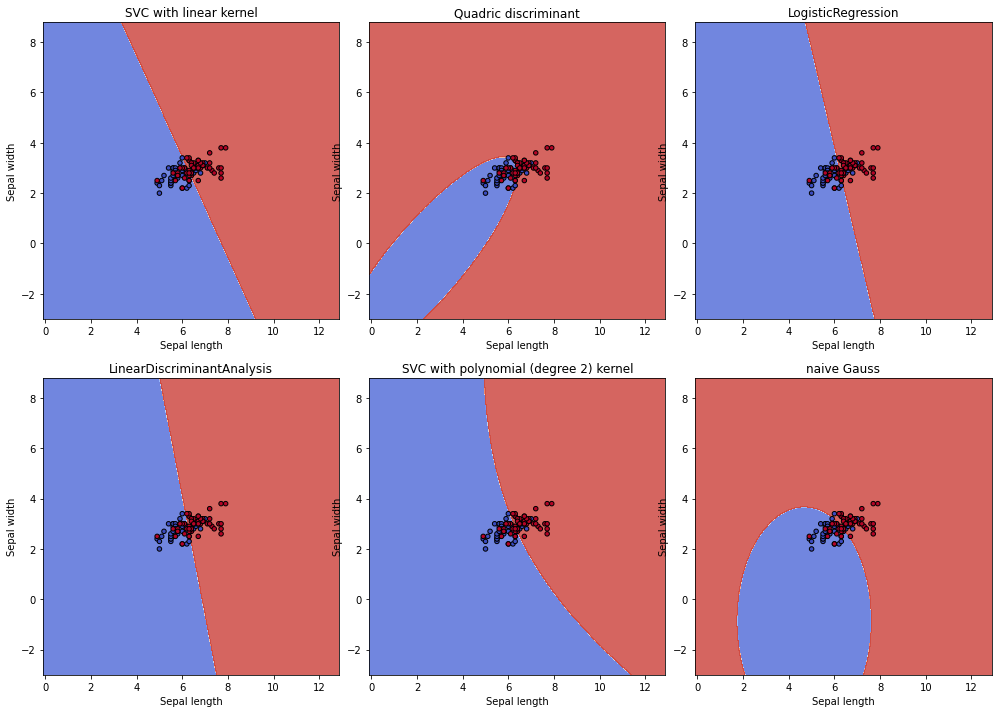

In [13]:
X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

C = 1.0  # SVM regularization parameter
models = [
    svm.SVC(kernel='linear', C=C),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=0),
    LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
    GaussianNB()
]

for clf in models:
  clf.fit(X, y)

# title for the plots
titles = [
    'SVC with linear kernel',
    'Quadric discriminant',
    'LogisticRegression',
    'LinearDiscriminantAnalysis',
    'SVC with polynomial (degree 2) kernel',
    'naive Gauss'
]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_title(title)

plt.show()

# пукнт 3

In [34]:
X = iris.data[iris.target!=0]
y = iris.target[iris.target!=0] - 1

clf = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf = clf.fit(X,y)

p = clf.predict(X)
f'Erororor ::: {np.count_nonzero(p != y) / p.size *100} %'

'Erororor ::: 3.0 %'

In [35]:
def grid(size):
    return product(range(size), range(size))

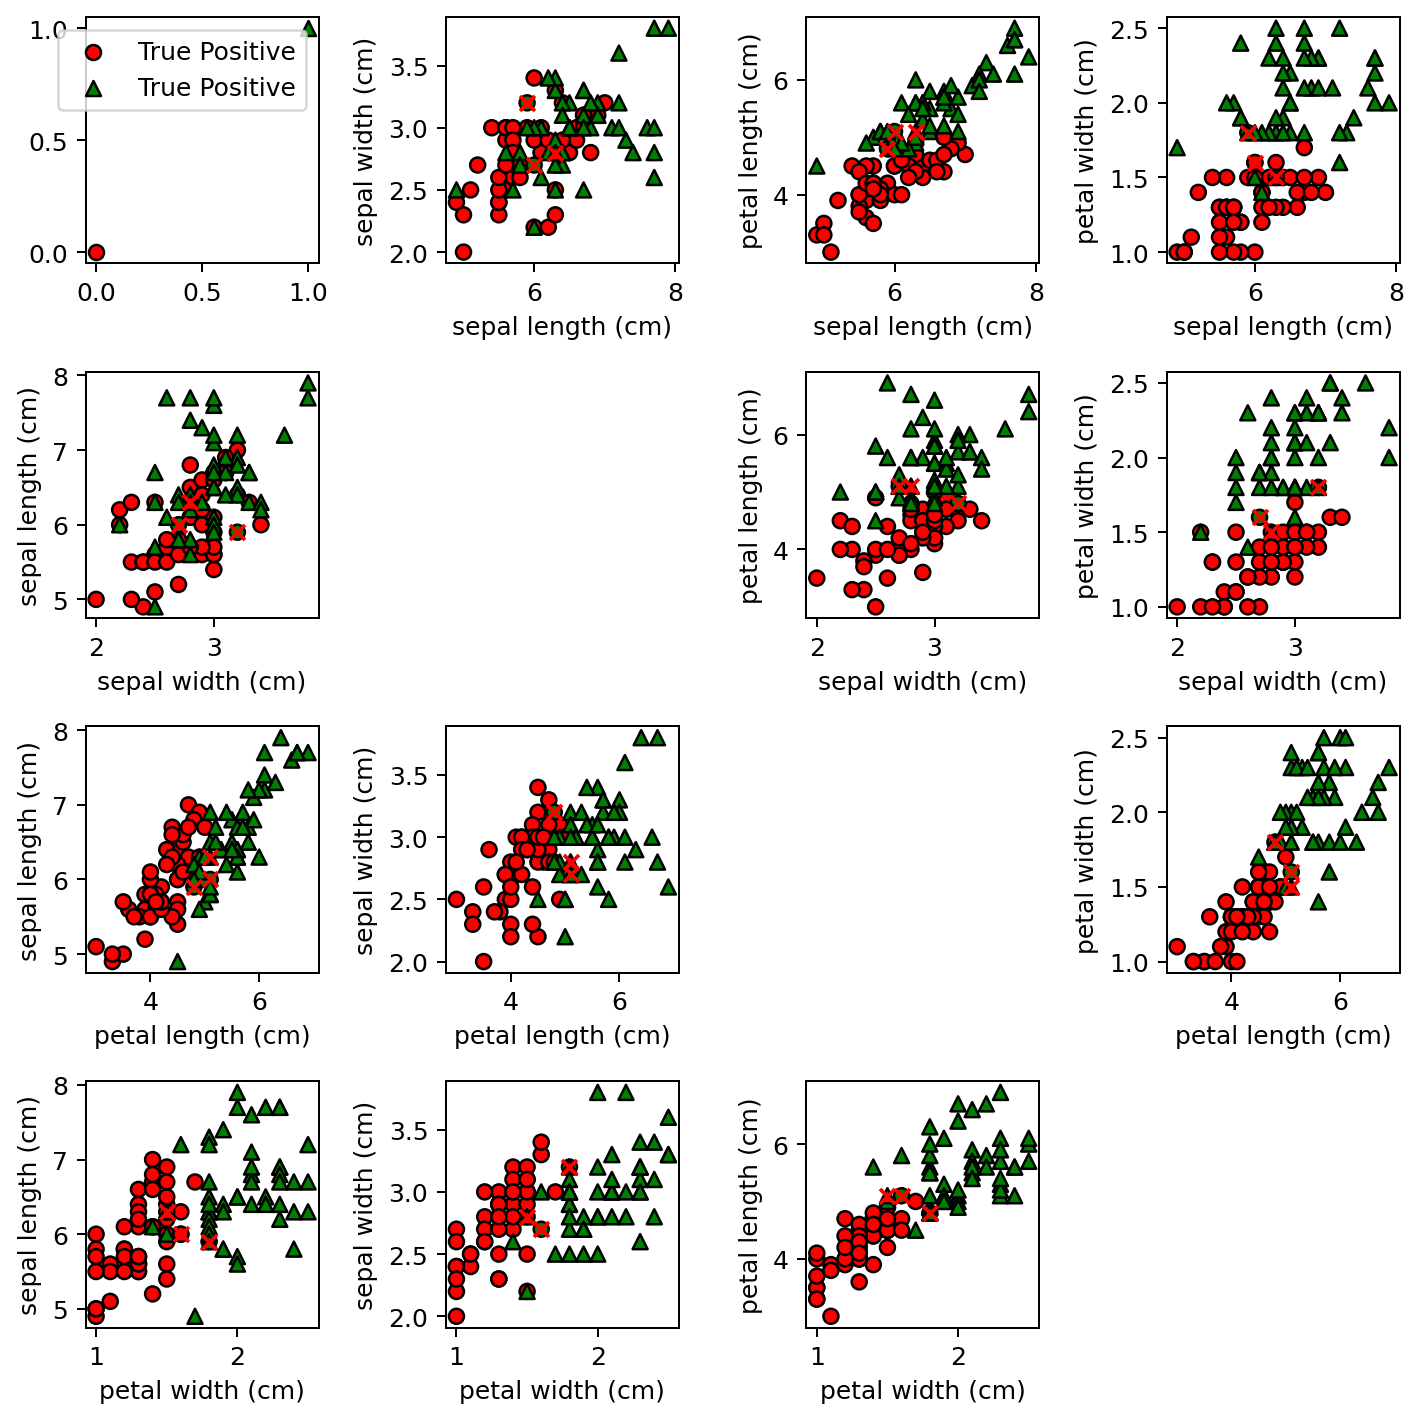

In [36]:
from itertools import product
num_features = X.shape[1] # number of features
num_targets = 2  
f_names = iris['feature_names']
gt_label_shape = ['o', '^', 's']
pred_label_color = ['r', 'g', 'blue']
plt.figure(figsize=(8, 8), dpi=180)

for i, (f1, f2) in enumerate(grid(num_features)):
    if f1 == f2:
        continue

    colors = np.array([pred_label_color[i] for i in p])
    
    plt.subplot(num_features, num_features, 1 + i)


    for gt in range(num_targets):
        mask = y == gt
        x_masked = X[mask, ...]
        shape = gt_label_shape[gt]
        plt.scatter(x_masked[:, f1], x_masked[:, f2], 
                    color=colors[mask], 
                    marker=shape,
                    edgecolor='k'
                    )


    plt.scatter(X[y != p, f1], X[y != p, f2], marker='x', color='r')
    plt.xlabel(f_names[f1])
    plt.ylabel(f_names[f2])

plt.subplot(num_features, num_features, 1)
for t in range(num_targets):
    plt.scatter(t,t, color=pred_label_color[t], marker=gt_label_shape[t], label='True Positive', edgecolor='k')
    plt.legend()
plt.tight_layout()

# Пункт 4

На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.





In [17]:
f1 = 0
f2 = 1
# Select two features f1 and f2 from dataset
classes = [1, 2]
x = X[y != 0, ...]
x = x[..., (f1, f2)]
y_new = y[y != 0]
x1, x2 = [x[y_new == c, ...] for c in classes]
cov1 = np.cov(x1, rowvar=False)
cov2 = np.cov(x2, rowvar=False)
mean1 = np.mean(x1, axis=0)
mean2 = np.mean(x2, axis=0)
P1, P2 = [np.count_nonzero(y_new == c) / y_new.shape[0] for c in classes]
detSigma = np.abs(np.linalg.det(cov1))
detLambda = np.abs(np.linalg.det(cov2))
invCov1 = np.linalg.inv(cov1)
invCov2 = np.linalg.inv(cov2)

print(f'mean_1 = {mean1}\nmean_2 = {mean2}\ndet sigma = {detSigma}\ndet lambda = {detLambda}')

def equation(x: np.ndarray):
    diff1 = x - mean1
    diff2 = x - mean2
    return 0.5 * (diff2.T @ invCov2 @ diff2 - diff1.T @ invCov1@ diff1) \
      + 0.5 * np.log(detLambda / detSigma) \
      + np.log(P1 / P2)


N = 1000
(x_max, y_max), (x_min, y_min) = x.max(axis=0) * 1.1, x.min(axis=0) * 0.9
xs = np.linspace(x_min, x_max, N)
ys = np.linspace(y_min, y_max, N)
grid = np.ndarray(shape=(N*N, 2))
for i, (_x, _y) in enumerate(product(xs, ys)):
    grid[i] = (_x, _y)

eq = np.vectorize(equation, signature='(m)->()')

res = eq(grid)

mean_1 = [5.936 2.77 ]
mean_2 = [6.588 2.974]
det sigma = 0.018979201999167018
det lambda = 0.03326175760099959


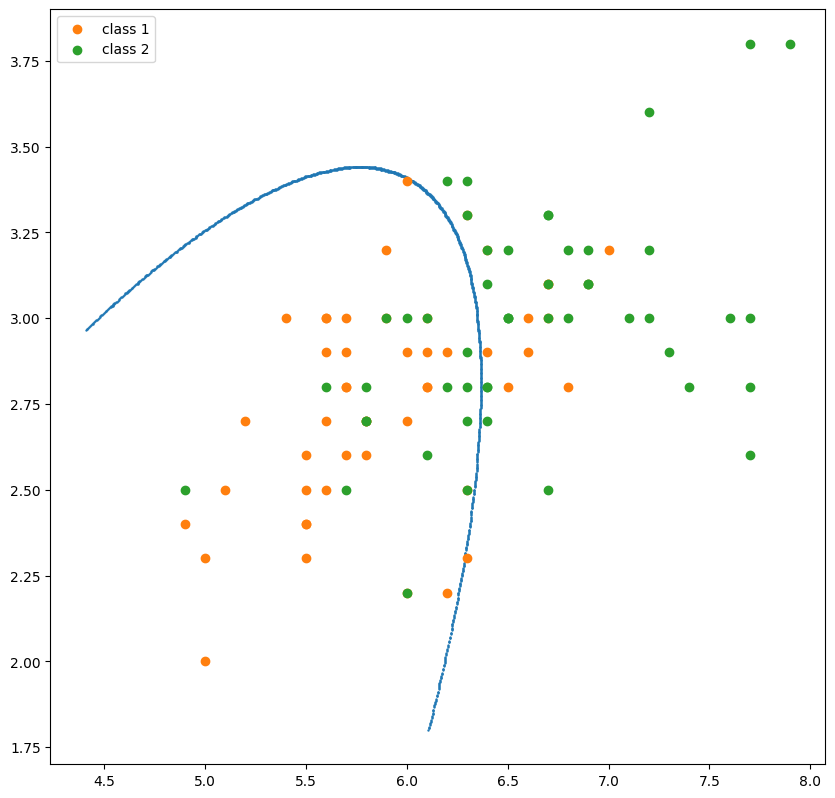

In [18]:
mask = np.abs(res) < 0.005
grid_masked = grid[mask, ...]
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(grid_masked[..., 0], grid_masked[...,1], marker='.', s=2)
plt.scatter(x1[:, 0], x1[:, 1], label='class 1')
plt.scatter(x2[:, 0], x2[:, 1], label='class 2')

plt.legend();

Добавить поверхность из sklearn